In [9]:
import numpy as np
import pandas as pd
import seaborn as sbn
import itertools
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

data = pd.read_csv('application_record.csv')
cstory = pd.read_csv('credit_record.csv')
# remove the restriction on the output of columns
pd.set_option('display.max_columns', None)

data

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43411,5125679,F,N,N,0,337500.0,Commercial associate,Secondary / secondary special,Married,Rented apartment,-18080,-1718,1,1,0,0,Managers,2.0
43412,5125680,F,N,N,0,337500.0,Commercial associate,Secondary / secondary special,Married,Rented apartment,-18080,-1718,1,1,0,0,Managers,2.0
43413,5125681,F,N,N,0,337500.0,Commercial associate,Secondary / secondary special,Married,Rented apartment,-18080,-1718,1,1,0,0,Managers,2.0
43414,5125682,F,N,Y,1,225000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-14058,-3694,1,0,0,0,Realty agents,3.0


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43416 entries, 0 to 43415
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   43416 non-null  int64  
 1   CODE_GENDER          43416 non-null  object 
 2   FLAG_OWN_CAR         43416 non-null  object 
 3   FLAG_OWN_REALTY      43416 non-null  object 
 4   CNT_CHILDREN         43416 non-null  int64  
 5   AMT_INCOME_TOTAL     43416 non-null  float64
 6   NAME_INCOME_TYPE     43416 non-null  object 
 7   NAME_EDUCATION_TYPE  43416 non-null  object 
 8   NAME_FAMILY_STATUS   43416 non-null  object 
 9   NAME_HOUSING_TYPE    43416 non-null  object 
 10  DAYS_BIRTH           43416 non-null  int64  
 11  DAYS_EMPLOYED        43416 non-null  int64  
 12  FLAG_MOBIL           43416 non-null  int64  
 13  FLAG_WORK_PHONE      43416 non-null  int64  
 14  FLAG_PHONE           43416 non-null  int64  
 15  FLAG_EMAIL           43416 non-null 

In [11]:
cstory.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 357768 entries, 0 to 357767
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   ID              357768 non-null  int64 
 1   MONTHS_BALANCE  357768 non-null  object
 2   STATUS          357767 non-null  object
dtypes: int64(1), object(2)
memory usage: 8.2+ MB


In [12]:
data['ID'].nunique()

43416

In [13]:
cstory['ID'].nunique() 

14793

In [14]:
len(set(data['ID']).intersection(set(cstory['ID']))) 

8430

In [15]:
data.isnull().sum()

ID                         0
CODE_GENDER                0
FLAG_OWN_CAR               0
FLAG_OWN_REALTY            0
CNT_CHILDREN               0
AMT_INCOME_TOTAL           0
NAME_INCOME_TYPE           0
NAME_EDUCATION_TYPE        0
NAME_FAMILY_STATUS         0
NAME_HOUSING_TYPE          0
DAYS_BIRTH                 0
DAYS_EMPLOYED              0
FLAG_MOBIL                 0
FLAG_WORK_PHONE            0
FLAG_PHONE                 0
FLAG_EMAIL                 0
OCCUPATION_TYPE        13527
CNT_FAM_MEMBERS            1
dtype: int64

In [16]:
cstory.isnull().sum()

ID                0
MONTHS_BALANCE    0
STATUS            1
dtype: int64

In [17]:
data = data.drop_duplicates('ID', keep='last')


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43416 entries, 0 to 43415
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   43416 non-null  int64  
 1   CODE_GENDER          43416 non-null  object 
 2   FLAG_OWN_CAR         43416 non-null  object 
 3   FLAG_OWN_REALTY      43416 non-null  object 
 4   CNT_CHILDREN         43416 non-null  int64  
 5   AMT_INCOME_TOTAL     43416 non-null  float64
 6   NAME_INCOME_TYPE     43416 non-null  object 
 7   NAME_EDUCATION_TYPE  43416 non-null  object 
 8   NAME_FAMILY_STATUS   43416 non-null  object 
 9   NAME_HOUSING_TYPE    43416 non-null  object 
 10  DAYS_BIRTH           43416 non-null  int64  
 11  DAYS_EMPLOYED        43416 non-null  int64  
 12  FLAG_MOBIL           43416 non-null  int64  
 13  FLAG_WORK_PHONE      43416 non-null  int64  
 14  FLAG_PHONE           43416 non-null  int64  
 15  FLAG_EMAIL           43416 non-null 

In [19]:
data.drop(['OCCUPATION_TYPE','FLAG_MOBIL','FLAG_WORK_PHONE','FLAG_PHONE','FLAG_EMAIL'], axis=1, inplace=True) 

In [20]:
data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 43416 entries, 0 to 43415
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   43416 non-null  int64  
 1   CODE_GENDER          43416 non-null  object 
 2   FLAG_OWN_CAR         43416 non-null  object 
 3   FLAG_OWN_REALTY      43416 non-null  object 
 4   CNT_CHILDREN         43416 non-null  int64  
 5   AMT_INCOME_TOTAL     43416 non-null  float64
 6   NAME_INCOME_TYPE     43416 non-null  object 
 7   NAME_EDUCATION_TYPE  43416 non-null  object 
 8   NAME_FAMILY_STATUS   43416 non-null  object 
 9   NAME_HOUSING_TYPE    43416 non-null  object 
 10  DAYS_BIRTH           43416 non-null  int64  
 11  DAYS_EMPLOYED        43416 non-null  int64  
 12  CNT_FAM_MEMBERS      43415 non-null  float64
dtypes: float64(2), int64(4), object(7)
memory usage: 4.6+ MB


In [21]:
objects_data = pd.DataFrame(data.dtypes =='object').reset_index()
object_type = objects_data[objects_data[0] == True]['index']
object_type

1            CODE_GENDER
2           FLAG_OWN_CAR
3        FLAG_OWN_REALTY
6       NAME_INCOME_TYPE
7    NAME_EDUCATION_TYPE
8     NAME_FAMILY_STATUS
9      NAME_HOUSING_TYPE
Name: index, dtype: object

In [22]:
a = data[object_type]['CODE_GENDER'].value_counts()
b = data[object_type]['FLAG_OWN_CAR'].value_counts()
c = data[object_type]['FLAG_OWN_REALTY'].value_counts()
d = data[object_type]['NAME_INCOME_TYPE'].value_counts()
e = data[object_type]['NAME_EDUCATION_TYPE'].value_counts()
f = data[object_type]['NAME_FAMILY_STATUS'].value_counts()
g = data[object_type]['NAME_HOUSING_TYPE'].value_counts()

print('\n',a,'\n\n',b,'\n\n',c,'\n\n',d,'\n\n',e,'\n\n',f,'\n\n',g)


 F    29504
M    13912
Name: CODE_GENDER, dtype: int64 

 N    27001
Y    16415
Name: FLAG_OWN_CAR, dtype: int64 

 Y    30062
N    13354
Name: FLAG_OWN_REALTY, dtype: int64 

 Working                 22111
Commercial associate    10155
Pensioner                7532
State servant            3605
Student                    13
Name: NAME_INCOME_TYPE, dtype: int64 

 Secondary / secondary special    29584
Higher education                 11814
Incomplete higher                 1610
Lower secondary                    379
Academic degree                     29
Name: NAME_EDUCATION_TYPE, dtype: int64 

 Married                 30337
Single / not married     5310
Civil marriage           3449
Separated                2450
Widow                    1870
Name: NAME_FAMILY_STATUS, dtype: int64 

 House / apartment      39054
With parents            1978
Municipal apartment     1315
Rented apartment         592
Office apartment         318
Co-op apartment          159
Name: NAME_HOUSING_TYPE, dty

In [23]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for x in data:
    if data[x].dtypes == 'object':
        data[x] = le.fit_transform(data[x])

In [24]:
data.head(10)

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,CNT_FAM_MEMBERS
0,5008804,1,1,1,0,427500.0,4,1,0,4,-12005,-4542,2.0
1,5008805,1,1,1,0,427500.0,4,1,0,4,-12005,-4542,2.0
2,5008806,1,1,1,0,112500.0,4,4,1,1,-21474,-1134,2.0
3,5008808,0,0,1,0,270000.0,0,4,3,1,-19110,-3051,1.0
4,5008809,0,0,1,0,270000.0,0,4,3,1,-19110,-3051,1.0
5,5008810,0,0,1,0,270000.0,0,4,3,1,-19110,-3051,1.0
6,5008811,0,0,1,0,270000.0,0,4,3,1,-19110,-3051,1.0
7,5008812,0,0,1,0,283500.0,1,1,2,1,-22464,365243,1.0
8,5008813,0,0,1,0,283500.0,1,1,2,1,-22464,365243,1.0
9,5008814,0,0,1,0,283500.0,1,1,2,1,-22464,365243,1.0


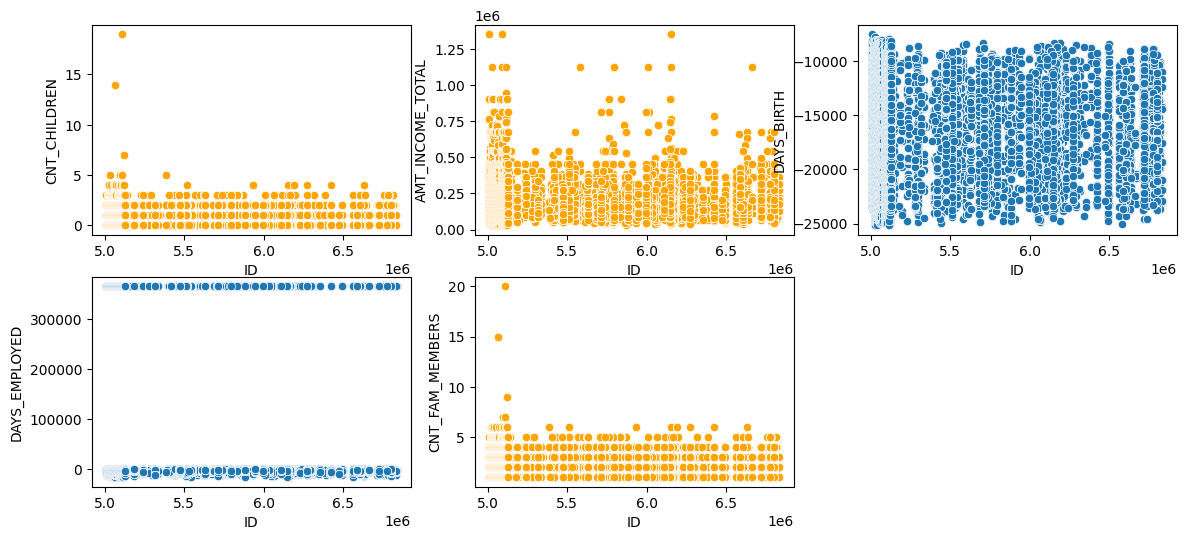

In [25]:
fig, ax= plt.subplots(nrows= 2, ncols = 3, figsize= (14,6))

sbn.scatterplot(x='ID', y='CNT_CHILDREN', data=data, ax=ax[0][0], color= 'orange')
sbn.scatterplot(x='ID', y='AMT_INCOME_TOTAL', data=data, ax=ax[0][1], color='orange')
sbn.scatterplot(x='ID', y='DAYS_BIRTH', data=data, ax=ax[0][2])
sbn.scatterplot(x='ID', y='DAYS_EMPLOYED', data=data, ax=ax[1][0])
sbn.scatterplot(x='ID', y='CNT_FAM_MEMBERS', data=data, ax=ax[1][1], color= 'orange')
fig.delaxes(ax[1][2])


In [26]:
q_hi = data['CNT_CHILDREN'].quantile(0.999)
q_low = data['CNT_CHILDREN'].quantile(0.001)
data = data[(data['CNT_CHILDREN']>q_low) & (data['CNT_CHILDREN']<q_hi)]

In [27]:
q_hi = data['AMT_INCOME_TOTAL'].quantile(0.999)
q_low = data['AMT_INCOME_TOTAL'].quantile(0.001)
data = data[(data['AMT_INCOME_TOTAL']>q_low) & (data['AMT_INCOME_TOTAL']<q_hi)]

In [28]:
q_hi = data['CNT_FAM_MEMBERS'].quantile(0.999)
q_low = data['CNT_FAM_MEMBERS'].quantile(0.001)
data = data[(data['CNT_FAM_MEMBERS']>q_low) & (data['CNT_FAM_MEMBERS']<q_hi)]

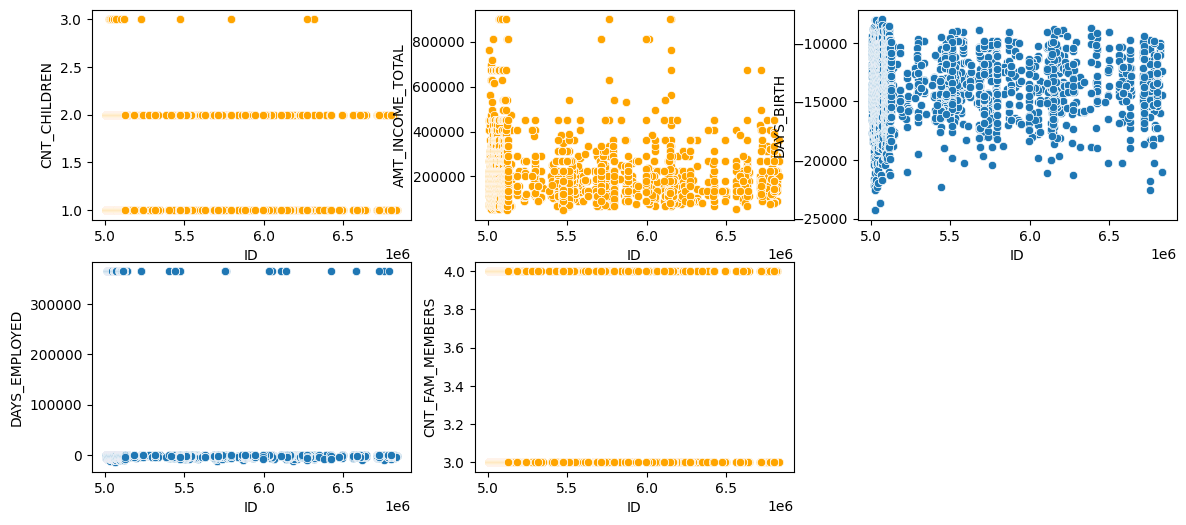

In [29]:
fig, ax= plt.subplots(nrows= 2, ncols = 3, figsize= (14,6))

sbn.scatterplot(x='ID', y='CNT_CHILDREN', data=data, ax=ax[0][0], color= 'orange')
sbn.scatterplot(x='ID', y='AMT_INCOME_TOTAL', data=data, ax=ax[0][1], color='orange')
sbn.scatterplot(x='ID', y='DAYS_BIRTH', data=data, ax=ax[0][2])
sbn.scatterplot(x='ID', y='DAYS_EMPLOYED', data=data, ax=ax[1][0])
sbn.scatterplot(x='ID', y='CNT_FAM_MEMBERS', data=data, ax=ax[1][1], color= 'orange')
fig.delaxes(ax[1][2])

In [30]:
cstory['STATUS'].value_counts() 

C    149098
0    130275
X     74282
1      3403
5       375
2       212
3        76
4        46
Name: STATUS, dtype: int64

In [31]:
cstory.nunique()

ID                14793
MONTHS_BALANCE      123
STATUS                8
dtype: int64

In [34]:
cstory['STATUS'].value_counts(normalize = True)


-1    0.624373
0     0.364134
1     0.009512
5     0.001048
2     0.000593
3     0.000212
4     0.000129
Name: STATUS, dtype: float64

In [36]:
cstory_gbid = cstory.groupby('ID').agg(max).reset_index()
cstory_gbid

,ID
0,5001711
1,5001712
2,5001713
3,5001714
4,5001715
...,...
14788,5041089
14789,5041090
14790,5041099
14791,5041100


In [ ]:
full_data.info()

In [ ]:
full_data['STATUS'].value_counts(normalize=True)


In [39]:
X = full_data.iloc[:,1:-1] # X value contains all the variables except labels
y = full_data.iloc[:,-1] # these are the labels
y

29       3.0
30       3.0
31       3.0
32       3.0
33       3.0
        ... 
14153    3.0
14173    3.0
14174    3.0
14175    3.0
14176    3.0
Name: CNT_FAM_MEMBERS, Length: 2126, dtype: float64

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [42]:
from imblearn.over_sampling import SMOTE

oversample = SMOTE()
X_balanced, y_balanced = oversample.fit_resample(X_train, y_train)
X_test_balanced, y_test_balanced = oversample.fit_resample(X_test, y_test)

In [43]:
a = y_train.value_counts()
b = y_balanced.value_counts()
print(a, "\n\n", b)

3.0    993
4.0    495
Name: CNT_FAM_MEMBERS, dtype: int64 

 4.0    993
3.0    993
Name: CNT_FAM_MEMBERS, dtype: int64


In [44]:
a = y_test.value_counts()
b = y_test_balanced.value_counts()
print(a, "\n\n", b)

3.0    447
4.0    191
Name: CNT_FAM_MEMBERS, dtype: int64 

 3.0    447
4.0    447
Name: CNT_FAM_MEMBERS, dtype: int64


In [45]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Accuracy Score is 0.9988814
     0    1
0  446    1
1    0  447
Normalized confusion matrix
[[0.99776286 0.00223714]
 [0.         1.        ]]


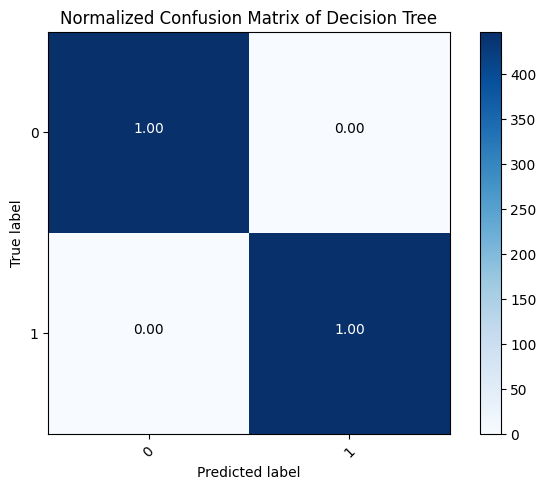

In [46]:
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split

model = DecisionTreeClassifier(max_depth=16,
                               min_samples_split=8,
                               random_state=1024)

model.fit(X_balanced, y_balanced)
y_predict = model.predict(X_test_balanced)
class_names = ['0','1']
print('Accuracy Score is {:.7}'.format(accuracy_score(y_test_balanced, y_predict)))
print(pd.DataFrame(confusion_matrix(y_test_balanced,y_predict)))

plot_confusion_matrix(confusion_matrix(y_test_balanced,y_predict),
                      classes=class_names, normalize = True, 
                      title='Normalized Confusion Matrix of Decision Tree')

Accuracy Score is 0.9888143
     0    1
0  437   10
1    0  447
Normalized confusion matrix
[[0.97762864 0.02237136]
 [0.         1.        ]]


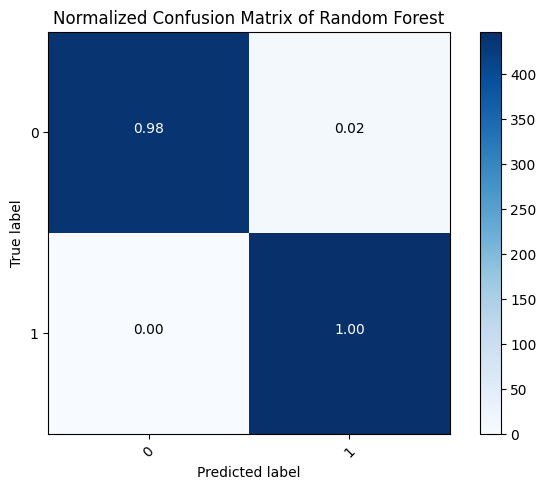

In [47]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=250,
                              max_depth=16,
                              min_samples_leaf=12
                              )

model.fit(X_balanced, y_balanced)
y_predict = model.predict(X_test_balanced)
class_names = ['0','1']
print('Accuracy Score is {:.7}'.format(accuracy_score(y_test_balanced, y_predict)))
print(pd.DataFrame(confusion_matrix(y_test_balanced,y_predict)))

plot_confusion_matrix(confusion_matrix(y_test_balanced,y_predict),
                      classes=class_names, normalize = True, 
                      title='Normalized Confusion Matrix of Random Forest')

Accuracy Score is 0.5223714
     0    1
0  131  316
1  111  336
Normalized confusion matrix
[[0.29306488 0.70693512]
 [0.24832215 0.75167785]]


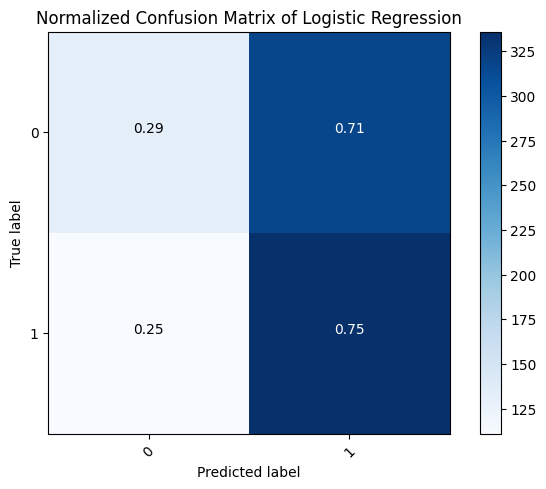

In [48]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(C=0.8,
                           random_state=0,
                           solver='lbfgs')

model.fit(X_balanced, y_balanced)
y_predict = model.predict(X_test_balanced)
class_names = ['0','1']
print('Accuracy Score is {:.7}'.format(accuracy_score(y_test_balanced, y_predict)))
print(pd.DataFrame(confusion_matrix(y_test_balanced,y_predict)))

plot_confusion_matrix(confusion_matrix(y_test_balanced,y_predict),
                      classes=class_names, normalize = True, 
                      title='Normalized Confusion Matrix of Logistic Regression')